### Attribute Information:
Date : year-month-day <br>
Rented Bike count - Count of bikes rented at each hour<br>
Hour - Hour of he day<br>
Temperature-Temperature in Celsius<br>
Humidity - %<br>
Windspeed - m/s<br>
Visibility - 10m<br>
Dew point temperature - Celsius<br>
Solar radiation - MJ/m2<br>
Rainfall - mm<br>
Snowfall - cm<br>
Seasons - Winter, Spring, Summer, Autumn<br>
Holiday - Holiday/No holiday<br>
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)<br>

In [3]:
import pandas as pd
import numpy as np 
dataset = pd.read_csv("SeoulBikeData.csv",encoding='latin1') 
dataset.head(3) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
dataset.isnull().sum() # check the Missing Data

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [5]:
dataset.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
X = dataset.iloc[:, 2:].values # independent variable
Y = dataset.iloc[:, 1].values  # dependent variable(Rented Bike Count)
print(X,Y) # check the X,Y

[[0 -5.2 37 ... 'Winter' 'No Holiday' 'Yes']
 [1 -5.5 38 ... 'Winter' 'No Holiday' 'Yes']
 [2 -6.0 39 ... 'Winter' 'No Holiday' 'Yes']
 ...
 [21 2.6 39 ... 'Autumn' 'No Holiday' 'Yes']
 [22 2.1 41 ... 'Autumn' 'No Holiday' 'Yes']
 [23 1.9 43 ... 'Autumn' 'No Holiday' 'Yes']] [254 204 173 ... 694 712 584]


In [7]:
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Encoding holiday
holiday = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X = np.array(holiday.fit_transform(X))
print(X)

[[0.0 1.0 0 ... 0.0 'Winter' 'Yes']
 [0.0 1.0 1 ... 0.0 'Winter' 'Yes']
 [0.0 1.0 2 ... 0.0 'Winter' 'Yes']
 ...
 [0.0 1.0 21 ... 0.0 'Autumn' 'Yes']
 [0.0 1.0 22 ... 0.0 'Autumn' 'Yes']
 [0.0 1.0 23 ... 0.0 'Autumn' 'Yes']]


In [8]:
# Encoding Functioning Day
Functioning = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(Functioning.fit_transform(X))
print(X)

[[0.0 1.0 0.0 ... 0.0 0.0 'Winter']
 [0.0 1.0 0.0 ... 0.0 0.0 'Winter']
 [0.0 1.0 0.0 ... 0.0 0.0 'Winter']
 ...
 [0.0 1.0 0.0 ... 0.0 0.0 'Autumn']
 [0.0 1.0 0.0 ... 0.0 0.0 'Autumn']
 [0.0 1.0 0.0 ... 0.0 0.0 'Autumn']]


In [9]:
# Encoding seasons
seasons = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X = np.array(seasons.fit_transform(X))
print(X)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [10]:
print(X[1,:]) #Check the array

[0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1 -5.5 38 0.8 2000 -17.6 0.0 0.0 0.0]


In [11]:
# Scale of all features should be similar
# Min-Max Scaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
print(X[1,:]) #Check the array

[0.         0.         0.         1.         0.         1.
 0.         1.         0.04347826 0.21503497 0.3877551  0.10810811
 1.         0.22491349 0.         0.         0.        ]


In [13]:
show_data = pd.DataFrame(data=X, columns=["Autumn","Summer","Spring","Winter","NoFunc","YesFunc",
                                          "Holiday","No_Holiday","Hour","Temperature","Humidity","Wind_speed",
                                          "Visibility","Dew_point_temperature","Solar_Radiation","Rainfall","Snowfall"])
show_data.head(3) # view the data

,Autumn,Summer,Spring,Winter,NoFunc,YesFunc,Holiday,No_Holiday,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0


In [14]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [15]:
print(Y)

[253 203 172 ... 686 704 580]


In [16]:
# check the Dependent Variable
import numpy as np
print(Y.shape,X.shape)

(8760,) (8760, 17)


In [17]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
print(Y_train.shape, X_train.shape, Y_test.shape, X_test.shape)

(6132,) (6132, 17) (2628,) (2628, 17)


In [18]:
# ADD 1 TO FIRST COLUMN for B_0
rows_train = len(X_train)
rows_test = len(X_test)
X_train = np.concatenate((np.ones((rows_train, 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((rows_test, 1)), X_test), axis=1)
print(X_test.shape, X_train.shape)

(2628, 18) (6132, 18)


### Linear Regration

In [19]:
def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
 return J

In [20]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  
  for iteration in range(iterations):
      #print(iteration)
      #Hypothesis Values = y_hat
      h = X.dot(B) 
      # Difference b/w Hypothesis and Actual Y
      loss = h - Y
      # Gradient Calculation
      gradient = X.T.dot(loss) / m
      # Changing Values of B using Gradient
      B = B - alpha * gradient
      # New Cost Value
      cost = cost_function(X, Y, B)
      cost_history[iteration] = cost 
 
  return B, cost_history

### First Try All variables.

In [21]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.4
iter_ = 5000
newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

In [22]:
#newB
np.around(newB, decimals=2)

array([  -97.18,   133.03,    10.11,   -11.22,  -229.1 ,  -484.94,
         387.76,  -104.88,     7.7 ,   566.02,   670.74, -1037.91,
          48.54,    11.77,   699.6 ,  -190.1 , -1601.69,   276.35])

In [23]:
cost_history[-1]

68479.52413174338

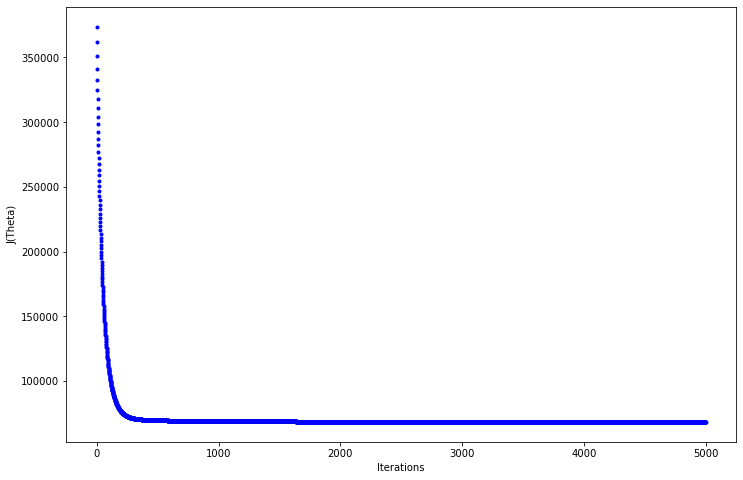

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

In [25]:
# Evaluating / Testing the model :
y_pred = np.dot(X_test, newB)
# In the best case, the modeled values exactly match the observed values, which results in SSR=0, R^2=1.
# A baseline model, which always predicts y, will have R^2=0.
# Models that have worse predictions than this baseline will have a negative R^2.
def r2(y_pred,y): # R_squared
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_pred-y)**2)
  r2 = 1-(ssr/sst)
  return(r2)
#----------------
r2(y_pred,Y_test)

0.5851642772328947

#### FIRST TRY ERROR PLOT

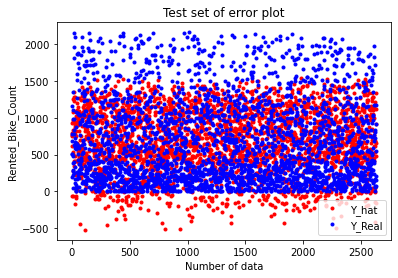

In [26]:
# importing the required module 
import matplotlib.pyplot as plt 

def createList(r1, r2): 
    return [item for item in range(r1, r2+1)] 

# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test.dot(newB2)
Y_test
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.", label ="Y_hat") # predict
plt.plot(rowlist, Y_test,"b.",label = "Y_Real") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
plt.legend()
# function to show the plot 
plt.show() 

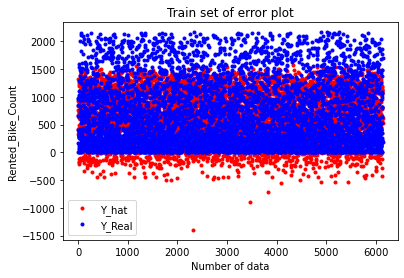

In [27]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train.dot(newB2)
Y_train
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_train,"b.",label ="Y_Real") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
plt.legend()
# function to show the plot 
plt.show() 

### Second Try

In [28]:
B = np.zeros(X_train.shape[1])
alpha = 0.001
iter_ = 1000
newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

In [29]:
#newB, cost_history
np.around(newB, decimals=2),cost_history[-1]

(array([114.83,  52.95,  37.35,  82.98, -58.45, -15.65, 130.49,   2.02,
        112.82, 120.98, 114.77,  42.65,  34.75, 110.58, 107.13,  52.08,
         -2.12,  -2.48]),
 126538.38558549249)

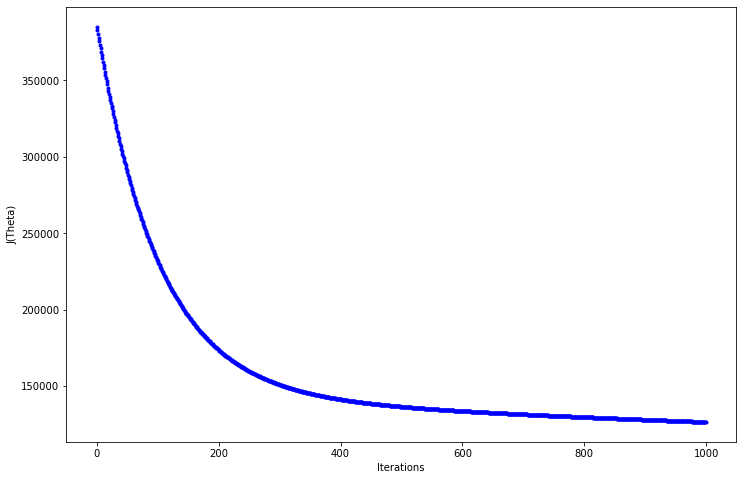

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

In [31]:
# Evaluating / Testing the model :
y_pred = np.dot(X_test, newB)
def r2(y_pred,y): # R_squared
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_pred-y)**2)
  r2 = 1-(ssr/sst)
  return(r2)
#----------------
r2(y_pred,Y_test)

0.23436095153509917

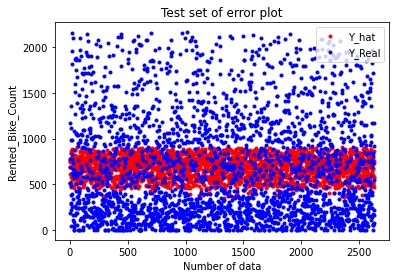

In [32]:
# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test.dot(newB2)
Y_test
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_test,"b.",label ="Y_Real") # real
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

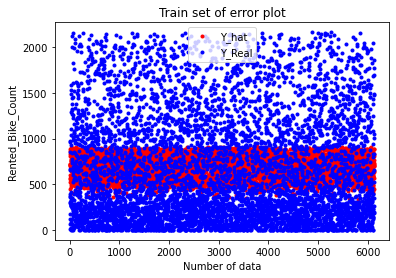

In [33]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train.dot(newB2)
Y_train
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_train,"b.",label ="Y_Real") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

### Third Try

In [34]:
B = np.zeros(X_train.shape[1])
alpha = 0.001
iter_ = 10000
newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

In [35]:
#newB, cost_history
np.around(newB, decimals=2),cost_history[-1]

(array([   8.26,  112.32,   38.6 ,  180.87, -323.53, -175.19,  183.45,
         -20.64,   28.9 ,  420.29,  254.93, -208.62,   54.16,  163.8 ,
         147.38,  160.37,  -26.13,  -15.  ]),
 84245.37398796868)

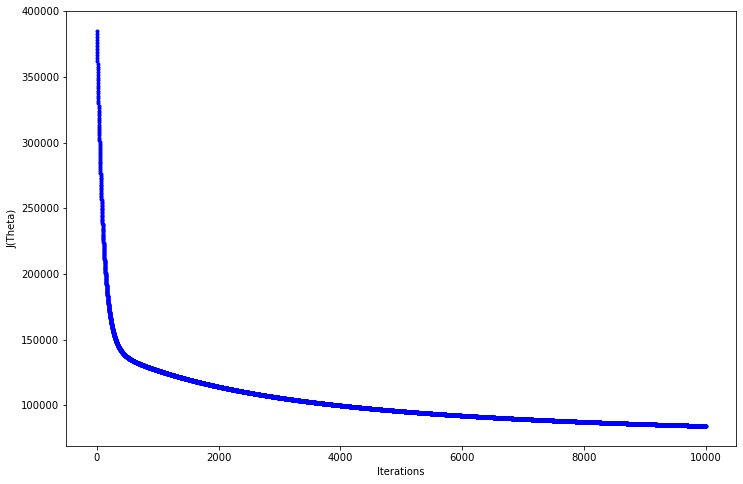

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

In [37]:
# Evaluating / Testing the model :
y_pred = np.dot(X_test, newB)
def r2(y_pred,y): # R_squared
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_pred-y)**2)
  r2 = 1-(ssr/sst)
  return(r2)
#----------------
r2(y_pred,Y_test)

0.4901464876987679

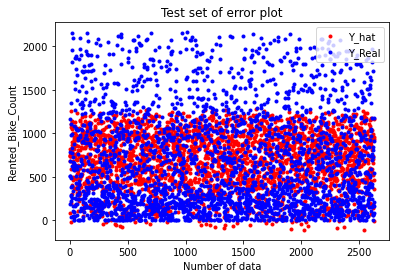

In [38]:
# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test.dot(newB2)
Y_test
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_test,"b.",label ="Y_Real") # real
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

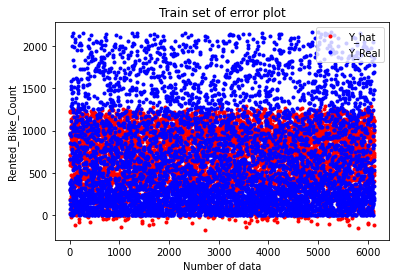

In [39]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train.dot(newB2)
Y_train
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_train,"b.",label ="Y_Real") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

Four Try

In [40]:
B = np.zeros(X_train.shape[1])
alpha = 0.5
iter_ = 10000
newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

C:\Users\jeffr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-19-9233d390187f>:3: RuntimeWarning: overflow encountered in square
  J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)


In [41]:
#newB, cost_history
np.around(newB, decimals=2),cost_history[-1]

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan]),
 nan)

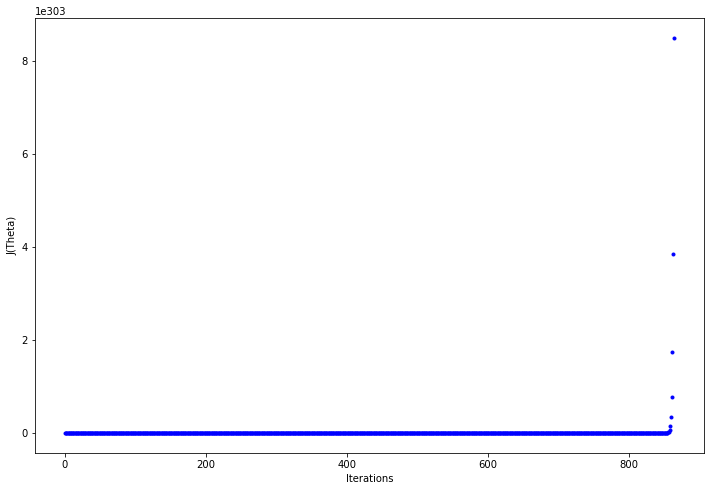

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

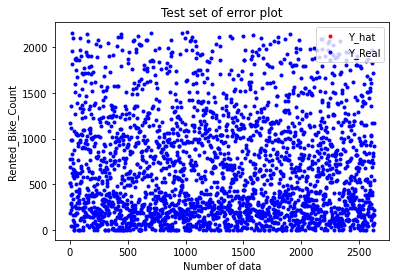

In [43]:
# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test.dot(newB2)
Y_test
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_test,"b.",label ="Y_Real") # real
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

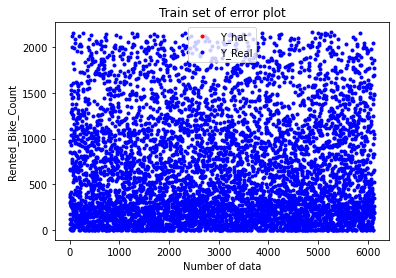

In [44]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train.dot(newB2)
Y_train
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.",label ="Y_hat") # predict
plt.plot(rowlist, Y_train,"b.",label ="Y_Real") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
plt.legend()  
# function to show the plot 
plt.show() 

## Eight Random Features into models

In [45]:
import random
random.seed(30)
#Generate 8 random numbers between 1 and 12
randomlist = random.sample(range(1, 12), 8)
randomlist.sort()
randomlist

[1, 3, 4, 5, 8, 9, 10, 11]

In [46]:
dataset8 = dataset 
dataset8.head(1) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [47]:
# first Features start from Hours
r8 = [2, 4, 5, 6, 9, 10, 11, 12]
X_8r = dataset8.iloc[:, r8].values # independent variable
Y_8r = dataset8.iloc[:, 1].values  # dependent variable(Rented Bike Count)
print(X_8r[0],Y_8r) # check the X,Y

[0 37 2.2 2000 0.0 0.0 'Winter' 'No Holiday'] [254 204 173 ... 694 712 584]


In [48]:
holiday = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_8r = np.array(holiday.fit_transform(X_8r))
print(X_8r[0])

[0.0 1.0 0 37 2.2 2000 0.0 0.0 'Winter']


In [49]:
seasons = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_8r = np.array(seasons.fit_transform(X_8r))
print(X_8r[0])

[0.0 0.0 0.0 1.0 0.0 1.0 0 37 2.2 2000 0.0 0.0]


In [50]:
scaler = preprocessing.MinMaxScaler()
X_8r= scaler.fit_transform(X_8r)
print(X_8r[0])

[0.         0.         0.         1.         0.         1.
 0.         0.37755102 0.2972973  1.         0.         0.        ]


In [51]:
le = LabelEncoder()
Y_8r = le.fit_transform(Y_8r)
print(Y_8r)
print(Y_8r.shape,X_8r.shape)

[253 203 172 ... 686 704 580]
(8760,) (8760, 12)


In [52]:
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X_8r, Y_8r, test_size = 0.3, random_state = 1)
print(Y_train8.shape, X_train8.shape, Y_test8.shape, X_test8.shape)

(6132,) (6132, 12) (2628,) (2628, 12)


In [53]:
# ADD 1 TO FIRST COLUMN for B_0
rows_train = len(X_train8)
rows_test = len(X_test8)
X_train8 = np.concatenate((np.ones((rows_train, 1)), X_train8), axis=1)
X_test8 = np.concatenate((np.ones((rows_test, 1)), X_test8), axis=1)
print(X_test8.shape, X_train8.shape)

(2628, 13) (6132, 13)


### Radom 8 Try

In [54]:
B = np.zeros(X_train8.shape[1])
alpha = 0.4
iter_ = 5000
newB, cost_history = batch_gradient_descent(X_train8, Y_train8, B, alpha, iter_)

In [55]:
#newB, cost_history
np.around(newB, decimals=2),cost_history[-1]

(array([  408.83,   221.25,   141.36,   451.41,  -405.18,   161.8 ,
          247.03,   682.28,  -692.24,   -20.15,    -5.93, -1704.82,
           98.46]),
 86326.05478294459)

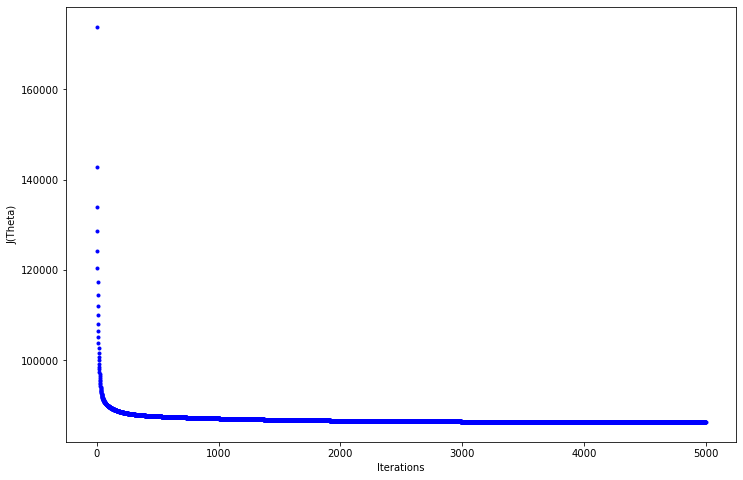

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

In [57]:
# Evaluating / Testing the model :
y_pred = np.dot(X_test8, newB)
def r2(y_pred,y): # R_squared
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_pred-y)**2)
  r2 = 1-(ssr/sst)
  return(r2)
#----------------
r2(y_pred,Y_test8)

0.4645121153562012

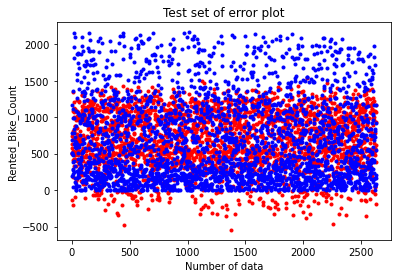

In [58]:
# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test8.dot(newB2)
Y_test8
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.") # predict
plt.plot(rowlist, Y_test8,"b.") # real
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
  
# function to show the plot 
plt.show() 

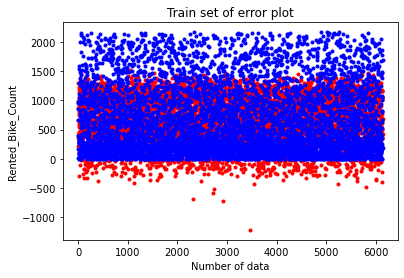

In [59]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train8.dot(newB2)
Y_train8
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.") # predict
plt.plot(rowlist, Y_train8,"b.") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
  
# function to show the plot 
plt.show() 

### Eight Select Features into models

In [60]:
dataset8s = dataset
dataset8s.head(1) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [61]:
# first Features start from Hours
r8s = [3,4,5,6,7,8,9,10]
X_8s = dataset8.iloc[:, r8s].values # independent variable
Y_8s = dataset8.iloc[:, 1].values  # dependent variable(Rented Bike Count)
print(X_8s[0],Y_8s) # check the X,Y

[  -5.2   37.     2.2 2000.   -17.6    0.     0.     0. ] [254 204 173 ... 694 712 584]


In [62]:
scaler = preprocessing.MinMaxScaler()
X_8s= scaler.fit_transform(X_8s)
print(X_8s[0])

[0.22027972 0.37755102 0.2972973  1.         0.22491349 0.
 0.         0.        ]


In [63]:
le = LabelEncoder()
Y_8s = le.fit_transform(Y_8r)
print(Y_8s)
print(Y_8s.shape,X_8s.shape)

[253 203 172 ... 686 704 580]
(8760,) (8760, 8)


In [64]:
X_train8s, X_test8s, Y_train8s, Y_test8s = train_test_split(X_8s, Y_8s, test_size = 0.3, random_state = 1)
print(Y_train8s.shape, X_train8s.shape, Y_test8s.shape, X_test8s.shape)

(6132,) (6132, 8) (2628,) (2628, 8)


In [65]:
# ADD 1 TO FIRST COLUMN for B_0
rows_train = len(X_train8s)
rows_test = len(X_test8s)
X_train8s = np.concatenate((np.ones((rows_train, 1)), X_train8s), axis=1)
X_test8s = np.concatenate((np.ones((rows_test, 1)), X_test8s), axis=1)
print(X_test8s.shape, X_train8s.shape)

(2628, 9) (6132, 9)


### Select 8 Try

In [66]:
B = np.zeros(X_train8s.shape[1])
alpha = 0.4
iter_ = 5000
newB, cost_history = batch_gradient_descent(X_train8s, Y_train8s, B, alpha, iter_)

In [67]:
#newB, cost_history
np.around(newB, decimals=2),cost_history[-1]

(array([  356.71,  1298.84, -1217.33,   283.74,   -29.57,   580.15,
         -312.65, -1382.84,   297.4 ]),
 95887.12319454347)

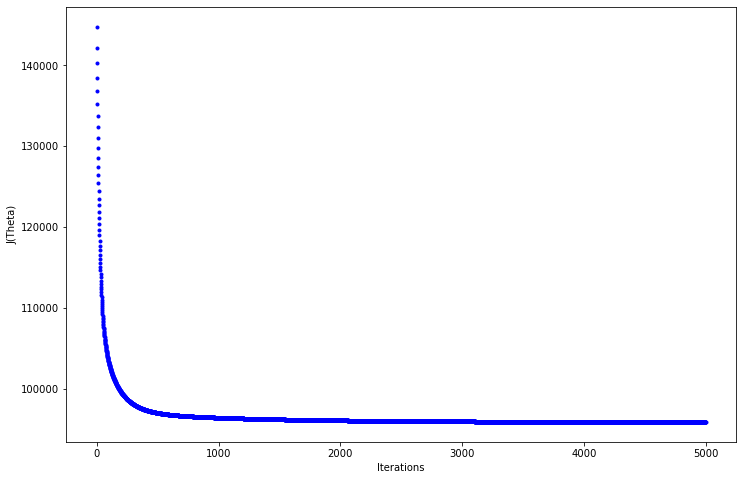

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iter_),cost_history,'b.')

In [69]:
# Evaluating / Testing the model :
y_pred = np.dot(X_test8s, newB)
def r2(y_pred,y): # R_squared
  sst = np.sum((y-y.mean())**2)
  ssr = np.sum((y_pred-y)**2)
  r2 = 1-(ssr/sst)
  return(r2)
#----------------
r2(y_pred,Y_test8s)

0.41477794448309013

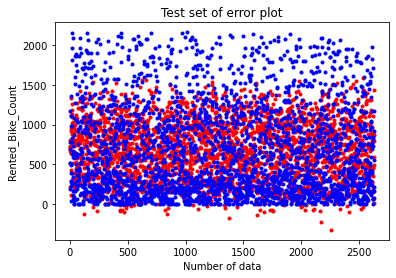

In [70]:
# x axis values 
rowlist = createList(1, 2628)

newB2 = np.around(newB, decimals=2)
Y_hat = X_test8s.dot(newB2)
Y_test8s
  
# plotting the points  
plt.plot(rowlist,Y_hat, "r.") # predict
plt.plot(rowlist, Y_test8s,"b.") # real
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Test set of error plot') 
  
# function to show the plot 
plt.show() 

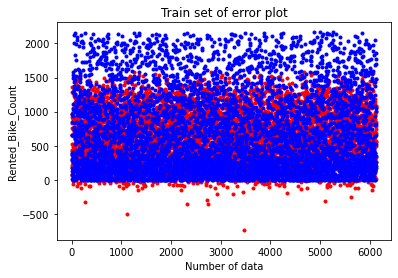

In [71]:
# x axis values 
rowlist = createList(1, 6132)

newB2 = np.around(newB, decimals=2)
Y_hat = X_train8s.dot(newB2)
Y_train8s
  
# plotting the points  
plt.plot(rowlist, Y_hat,"r.") # predict
plt.plot(rowlist, Y_train8,"b.") # real
  
# naming the x axis 
plt.xlabel('Number of data') 
# naming the y axis 
plt.ylabel('Rented_Bike_Count') 
  
# giving a title to my graph 
plt.title('Train set of error plot') 
  
# function to show the plot 
plt.show() 

## Logistic Part

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [75]:
dataset2 = pd.read_csv("SeoulBikeData.csv",encoding='latin1') 
dataset2.head(2) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [76]:
dataset2['Rented Bike Count'] = dataset2['Rented Bike Count'].astype(float)
dataset2['Hour'] = dataset2['Hour'].astype(float)
dataset2['Humidity(%)'] = dataset2['Humidity(%)'].astype(float)
dataset2['Visibility (10m)'] = dataset2['Visibility (10m)'].astype(float)

In [77]:
dataset2.dtypes

Date                          object
Rented Bike Count            float64
Hour                         float64
Temperature(°C)              float64
Humidity(%)                  float64
Wind speed (m/s)             float64
Visibility (10m)             float64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [78]:
# remove the date
X_L= dataset2.iloc[:, 1:].values
print(X_L)

[[254.0 0.0 -5.2 ... 'Winter' 'No Holiday' 'Yes']
 [204.0 1.0 -5.5 ... 'Winter' 'No Holiday' 'Yes']
 [173.0 2.0 -6.0 ... 'Winter' 'No Holiday' 'Yes']
 ...
 [694.0 21.0 2.6 ... 'Autumn' 'No Holiday' 'Yes']
 [712.0 22.0 2.1 ... 'Autumn' 'No Holiday' 'Yes']
 [584.0 23.0 1.9 ... 'Autumn' 'No Holiday' 'Yes']]


In [79]:
# Encoding the Independent Variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Encoding Functioning Day
Functioning = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_L = np.array(Functioning.fit_transform(X_L))
print(X_L)

[[0.0 1.0 254.0 ... 0.0 'Winter' 'No Holiday']
 [0.0 1.0 204.0 ... 0.0 'Winter' 'No Holiday']
 [0.0 1.0 173.0 ... 0.0 'Winter' 'No Holiday']
 ...
 [0.0 1.0 694.0 ... 0.0 'Autumn' 'No Holiday']
 [0.0 1.0 712.0 ... 0.0 'Autumn' 'No Holiday']
 [0.0 1.0 584.0 ... 0.0 'Autumn' 'No Holiday']]


In [80]:
# Encoding seasons 
seasons = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-2])], remainder='passthrough')
X_L = np.array(seasons.fit_transform(X_L))
print(X_L)

[[0.0 0.0 0.0 ... 0.0 0.0 'No Holiday']
 [0.0 0.0 0.0 ... 0.0 0.0 'No Holiday']
 [0.0 0.0 0.0 ... 0.0 0.0 'No Holiday']
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 'No Holiday']
 [1.0 0.0 0.0 ... 0.0 0.0 'No Holiday']
 [1.0 0.0 0.0 ... 0.0 0.0 'No Holiday']]


In [81]:
# Encoding Holiday (No Holiday=0, Holiday = 1)
for i in range(len(X_L)):
  if X_L[i,-1] =="No Holiday":
     X_L[i,-1] = 0.0
  else:
    X_L[i,-1] = 1.0

print(X_L[1])
"""
import collections, numpy
chek_H= X_L[:,-1]
collections.Counter(chek_H)
"""

[0.0 0.0 0.0 1.0 0.0 1.0 204.0 1.0 -5.5 38.0 0.8 2000.0 -17.6 0.0 0.0 0.0
 0.0]


'\nimport collections, numpy\nchek_H= X_L[:,-1]\ncollections.Counter(chek_H)\n'

In [82]:
# All number into float for further 'exp' caculation 
X_L = X_L[:, :-1]
Y_L = X_L[:, -1]

In [83]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(X_L, Y_L, test_size = 0.3, random_state = 1)
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

(6132,) (6132, 16) (2628,) (2628, 16)


In [84]:
# just make the regression result more correctly, no need. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_L = sc.fit_transform(X_train_L)
X_test_L = sc.transform(X_test_L)

In [85]:
# Add one
X_train_L = np.concatenate((np.ones((len(X_train_L), 1)), X_train_L), axis=1)
X_test_L = np.concatenate((np.ones((len(X_test_L), 1)), X_test_L), axis=1)

In [86]:
# CHECKING
print(X_train_L[:2,:])
print(X_test_L[:2,:])
print(Y_train_L[0:2])
print(Y_test_L[0:2])
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

[[ 1.         -0.57483949 -0.57458841  1.72156931 -0.57910781 -0.18691364
   0.18691364  0.2443009   0.79116445  1.03414826  1.40666502 -1.07006969
  -1.13166338  1.43013904 -0.08175224 -0.13048284 -0.17682281]
 [ 1.         -0.57483949 -0.57458841  1.72156931 -0.57910781 -0.18691364
   0.18691364 -0.05024993 -0.21523499  1.0424484   0.81681177 -0.97453415
   0.92046118  1.25532504  0.46161113 -0.13048284 -0.17682281]]
[[ 1.         -0.57483949  1.7403762  -0.58086537 -0.57910781 -0.18691364
   0.18691364 -0.0132383  -0.50277769  0.44483842  0.22695851 -0.87899861
   0.48496208  0.52566662  0.50785482 -0.13048284 -0.17682281]
 [ 1.          1.73961604 -0.57458841 -0.58086537 -0.57910781 -0.18691364
   0.18691364  0.74549994 -0.35900634  0.88474577  0.66934845 -1.16560523
   0.0791561   1.06530983  0.45005021 -0.13048284 -0.17682281]]
[0.0 0.0]
[0.0 0.0]
(6132,) (6132, 17) (2628,) (2628, 17)


In [87]:
# change to float for exp caculation
X_train_L = X_train_L.astype(float)
X_test_L = X_test_L.astype(float)
Y_train_L = Y_train_L.astype(float)
Y_test_L = Y_test_L.astype(float)

## Y_train_L , X_train_L, Y_test_L, X_test_L

In [88]:
def sigmoid(x): #Hypothesis Values = y_hat
    return 1.0 / (1 + np.exp(-x))

def cost_funtion_L(X,Y,B):
    ln = X.dot(B)
    m = len(X)
    h = sigmoid(ln)
    cost = (np.log(h)@Y+np.log(1-h)@(1-Y))/(-m)
    return cost

In [89]:
def L_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    ln_history = [0] * iterations
    h_history = [0] * iterations
    error_history = [0]*iterations
    m = len(Y)

    for iteration in range(iterations):
        #print(iteration)
        #Hypothesis Values = y_hat
        ln = X.dot(B)
        ln_history[iteration] = ln
        h = sigmoid(ln)
        h_history[iteration] = h
        # Difference b/w Hypothesis and Actual Y
        error = h-Y
        error_history[iteration] = error
        # Gradient Calculation
        # gradient = X.T.dot(error) / m
        # Changing Values of B using Gradient
        B = B-alpha*X.T.dot(error)/m
        # New Cost Value
        cost = cost_funtion_L(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history, h_history, ln_history, error_history

## 1st try


In [90]:
B = np.zeros(X_train_L.shape[1])
iterations = 1000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

In [91]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.5:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 90 and 0 is 2538
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2538   30    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9722222222222222

## 2nd try

In [93]:
B = np.zeros(X_train_L.shape[1])
iterations = 10000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

<ipython-input-88-d122341d077a>:8: RuntimeWarning: divide by zero encountered in log
  cost = (np.log(h)@Y+np.log(1-h)@(1-Y))/(-m)


In [94]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.5:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 114 and 0 is 2514
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [95]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2514   54    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.963089802130898

## 3rd try

In [96]:
B = np.zeros(X_train_L.shape[1])
iterations = 10000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.005,iterations)

<ipython-input-88-d122341d077a>:8: RuntimeWarning: divide by zero encountered in log
  cost = (np.log(h)@Y+np.log(1-h)@(1-Y))/(-m)


In [97]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.5:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 123 and 0 is 2505
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [98]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2505   63    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9596651445966514

## 4th TRY

In [99]:
B = np.zeros(X_train_L.shape[1])
iterations = 1000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

In [100]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.3:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 102 and 0 is 2526
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [101]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2526   42    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9676560121765602

## 5th TRY

In [102]:
B = np.zeros(X_train_L.shape[1])
iterations = 10000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

<ipython-input-88-d122341d077a>:8: RuntimeWarning: divide by zero encountered in log
  cost = (np.log(h)@Y+np.log(1-h)@(1-Y))/(-m)


In [103]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.3:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 118 and 0 is 2510
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [104]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2510   58    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9615677321156774

## 6th TRY

In [105]:
B = np.zeros(X_train_L.shape[1])
iterations = 10000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.005,iterations)

<ipython-input-88-d122341d077a>:8: RuntimeWarning: divide by zero encountered in log
  cost = (np.log(h)@Y+np.log(1-h)@(1-Y))/(-m)


In [106]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.3:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 124 and 0 is 2504
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [107]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2504   64    0    0    0    0    0    0    0]
 [   0   17    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9592846270928462

## 7th TRY

In [108]:
B = np.zeros(X_train_L.shape[1])
iterations = 1000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

In [109]:
#newB_L
newB_Lr = np.around(newB_L, decimals=3)
newB_Lr

array([-0.375, -0.01 , -0.034, -0.025,  0.068, -0.01 ,  0.01 , -0.036,
       -0.003, -0.06 ,  0.039, -0.001, -0.04 , -0.038, -0.016, -0.004,
        0.382])

In [110]:
  X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.8:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 56 and 0 is 2572
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [111]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2568    0    0    0    0    0    0    0    0]
 [   4   13    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9821156773211568

## LR 8 Random Features models


In [112]:
import random
random.seed(50)
#Generate 8 random numbers between 1 and 12
randomlist = random.sample(range(1, 12), 8)
randomlist.sort()
randomlist

[1, 3, 4, 5, 6, 8, 9, 11]

In [113]:
dataset2_L = dataset2
dataset2_L.head(2) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [114]:
X_L2= dataset2.iloc[:, [1, 3, 4, 5, 6, 8, 9, 11]].values
print(X_L2)

[[254.0 -5.2 37.0 ... 0.0 0.0 'Winter']
 [204.0 -5.5 38.0 ... 0.0 0.0 'Winter']
 [173.0 -6.0 39.0 ... 0.0 0.0 'Winter']
 ...
 [694.0 2.6 39.0 ... 0.0 0.0 'Autumn']
 [712.0 2.1 41.0 ... 0.0 0.0 'Autumn']
 [584.0 1.9 43.0 ... 0.0 0.0 'Autumn']]


In [115]:
# Encoding the Independent Variable
# Encoding Seasons Day
seasons = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_L2 = np.array(seasons.fit_transform(X_L2))
Y_L2 = Y_L
print(X_L2)

[[0.0 0.0 0.0 ... 2000.0 0.0 0.0]
 [0.0 0.0 0.0 ... 2000.0 0.0 0.0]
 [0.0 0.0 0.0 ... 2000.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 1968.0 0.0 0.0]
 [1.0 0.0 0.0 ... 1859.0 0.0 0.0]
 [1.0 0.0 0.0 ... 1909.0 0.0 0.0]]


In [116]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(X_L2, Y_L2, test_size = 0.3, random_state = 1)
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

(6132,) (6132, 11) (2628,) (2628, 11)


In [117]:
# just make the regression result more correctly, no need. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_L = sc.fit_transform(X_train_L)
X_test_L = sc.transform(X_test_L)

In [118]:
# Add one
X_train_L = np.concatenate((np.ones((len(X_train_L), 1)), X_train_L), axis=1)
X_test_L = np.concatenate((np.ones((len(X_test_L), 1)), X_test_L), axis=1)
X_train_L = X_train_L.astype(float)
X_test_L = X_test_L.astype(float)
Y_test_L= Y_test_L.astype(float)
Y_train_L= Y_train_L.astype(float)

In [119]:
# CHECKING
print(X_train_L[:2,:])
print(X_test_L[:2,:])
print(Y_train_L[0:2])
print(Y_test_L[0:2])
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

[[ 1.         -0.57483949 -0.57458841  1.72156931 -0.57910781  0.2443009
   1.03414826  1.40666502 -1.07006969 -1.13166338 -0.08175224 -0.13048284]
 [ 1.         -0.57483949 -0.57458841  1.72156931 -0.57910781 -0.05024993
   1.0424484   0.81681177 -0.97453415  0.92046118  0.46161113 -0.13048284]]
[[ 1.         -0.57483949  1.7403762  -0.58086537 -0.57910781 -0.0132383
   0.44483842  0.22695851 -0.87899861  0.48496208  0.50785482 -0.13048284]
 [ 1.          1.73961604 -0.57458841 -0.58086537 -0.57910781  0.74549994
   0.88474577  0.66934845 -1.16560523  0.0791561   0.45005021 -0.13048284]]
[0. 0.]
[0. 0.]
(6132,) (6132, 12) (2628,) (2628, 12)


## LR 8 Random Features models try

In [120]:
B = np.zeros(X_train_L.shape[1])
iterations = 1000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

In [121]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.8:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 0 and 0 is 2628
[0 0 0 ... 0 0 0] (2628,) (2628,)


In [122]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2568    0    0    0    0    0    0    0    0]
 [  17    0    0    0    0    0    0    0    0]
 [  24    0    0    0    0    0    0    0    0]
 [  11    0    0    0    0    0    0    0    0]
 [   4    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0]]


0.9771689497716894

## LR 8 Select Features models


In [123]:
dataset2_L = dataset2
dataset2_L.head(2) # view the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [124]:
X_L2= dataset2.iloc[:, [1, 3, 4, 6, 7, 8, 9, 10]].values
print(X_L2)

[[254.   -5.2  37.  ...   0.    0.    0. ]
 [204.   -5.5  38.  ...   0.    0.    0. ]
 [173.   -6.   39.  ...   0.    0.    0. ]
 ...
 [694.    2.6  39.  ...   0.    0.    0. ]
 [712.    2.1  41.  ...   0.    0.    0. ]
 [584.    1.9  43.  ...   0.    0.    0. ]]


In [125]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_L, X_test_L, Y_train_L, Y_test_L = train_test_split(X_L2, Y_L2, test_size = 0.3, random_state = 1)
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

(6132,) (6132, 8) (2628,) (2628, 8)


In [126]:
# just make the regression result more correctly, no need. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_L = sc.fit_transform(X_train_L)
X_test_L = sc.transform(X_test_L)

In [127]:
# Add one
X_train_L = np.concatenate((np.ones((len(X_train_L), 1)), X_train_L), axis=1)
X_test_L = np.concatenate((np.ones((len(X_test_L), 1)), X_test_L), axis=1)
X_train_L = X_train_L.astype(float)
X_test_L = X_test_L.astype(float)
Y_test_L= Y_test_L.astype(float)
Y_train_L= Y_train_L.astype(float)

In [128]:
# CHECKING
print(X_train_L[:2,:])
print(X_test_L[:2,:])
print(Y_train_L[0:2])
print(Y_test_L[0:2])
print(Y_train_L.shape, X_train_L.shape, Y_test_L.shape, X_test_L.shape)

[[ 1.          0.2443009   1.03414826  1.40666502 -1.13166338  1.43013904
  -0.08175224 -0.13048284 -0.17682281]
 [ 1.         -0.05024993  1.0424484   0.81681177  0.92046118  1.25532504
   0.46161113 -0.13048284 -0.17682281]]
[[ 1.         -0.0132383   0.44483842  0.22695851  0.48496208  0.52566662
   0.50785482 -0.13048284 -0.17682281]
 [ 1.          0.74549994  0.88474577  0.66934845  0.0791561   1.06530983
   0.45005021 -0.13048284 -0.17682281]]
[0. 0.]
[0. 0.]
(6132,) (6132, 9) (2628,) (2628, 9)


## LR 8 Select Features models try

In [129]:
B = np.zeros(X_train_L.shape[1])
iterations = 1000
newB_L, cost_history_L,h_history, ln_history,error_history = L_gradient_descent(X_train_L,Y_train_L,B,0.001,iterations)

In [130]:
X_test_pred = X_test_L.dot(newB_L)
X_test_pred = X_test_pred.tolist()
qwe = len(X_test_pred)
probability = []
for i in range(qwe):
    if X_test_pred[i] > 0.8:
        probability.append(1)
    else:
        probability.append(0)

print("1 is {} and 0 is {}".format(probability.count(1),probability.count(0)))

probability = np.asarray(probability)

print( probability, probability.shape,Y_test_L.shape)


1 is 51 and 0 is 2577
[0 0 0 ... 1 0 0] (2628,) (2628,)


In [131]:
probability = probability.astype(int)
Y_test_L = Y_test_L.astype(int)
cm = confusion_matrix(Y_test_L, probability)
print(cm)
accuracy_score(Y_test_L, probability)

[[2568    0    0    0    0    0    0    0    0]
 [   9    8    0    0    0    0    0    0    0]
 [   0   24    0    0    0    0    0    0    0]
 [   0   11    0    0    0    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0]]


0.9802130898021308